# K-Nearest Neighbors Classifier

K-Nearest Neighbors (KNN) is a classification algorithm. The central idea is that data points with similar attributes tend to fall into similar categories.

Consider the image. For now, let’s just focus on where the data points are being placed. Every data point — whether its color is red, green, or white — has an x value and a y value. As a result, it can be plotted on this two-dimensional graph.

Next, let’s consider the color of the data. The color represents the class that the K-Nearest Neighbor algorithm is trying to classify. In this image, data points can either have the class green or the class red. If a data point is white, this means that it doesn’t have a class yet. The purpose of the algorithm is to classify these unknown points.

Finally, consider the expanding circle around the white point. This circle is finding the k nearest neighbors to the white point. When k = 3, the circle is fairly small. Two of the three nearest neighbors are green, and one is red. So in this case, the algorithm would classify the white point as green. However, when we increase k to 5, the circle expands, and the classification changes. Three of the nearest neighbors are red and two are green, so now the white point will be classified as red.

This is the central idea behind the K-Nearest Neighbor algorithm. If you have a dataset of points where the class of each point is known, you can take a new point with an unknown class, find it’s nearest neighbors, and classify it.

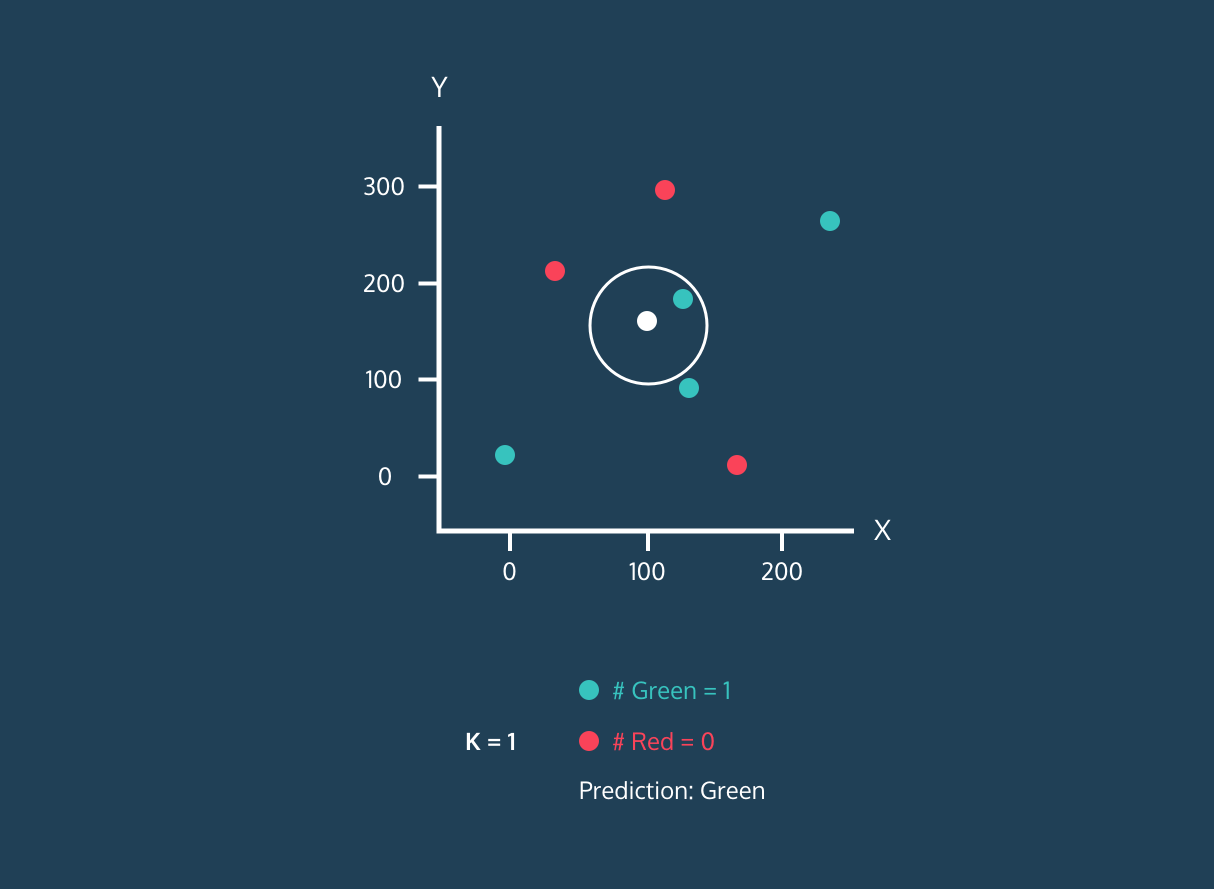

Before diving into the K-Nearest Neighbors algorithm, let’s first take a minute to think about an example.

Consider a dataset of movies. Let’s brainstorm some features of a movie data point. A feature is a piece of information associated with a data point. Here are some potential features of movie data points:

the length of the movie in minutes.<br>
the budget of a movie in dollars.<br>
If you think back to the previous exercise, you could imagine movies being places in that two-dimensional space based on those numeric features. There could also be some boolean features: features that are either true or false. For example, here are some potential boolean features:

Black and white. This feature would be True for black and white movies and False otherwise.<br>
Directed by Stanley Kubrick. This feature would be False for almost every movie, but for the few movies that were directed by Kubrick, it would be True.<br>
Finally, let’s think about how we might want to classify a movie. For the rest of this lesson, we’re going to be classifying movies as either good or bad. In our dataset, we’ve classified a movie as good if it had an IMDb rating of 7.0 or greater. Every “good” movie will have a class of 1, while every bad movie will have a class of 0.

To the right, we’ve created some movie data points where the first item in the list is the length, the second is the budget, and the third is whether the movie was directed by Stanley Kubrick.

Distance Between Points - 2D

We need to define what it means for two points to be close together or far apart. To do this, we’re going to use the Distance Formula.

For this example, the data has two dimensions:

The length of the movie<br>
The movie’s release date<br>
Consider Star Wars and Raiders of the Lost Ark. Star Wars is 125 minutes long and was released in 1977. Raiders of the Lost Ark is 115 minutes long and was released in 1981.

The distance between the movies is computed below:

<p>&#8730;((125-115)<sup>2</sup>+(1977-1981)<sup>2</sup>)=10.77</p>

1.
Write a function named distance that takes two lists named movie1 and movie2 as parameters.

You can assume that each of these lists contains two numbers — the first number being the movie’s runtime and the second number being the year the movie was released. The function should return the distance between the two lists.

Remember, in python, x ** 0.5 will give you the square root of x.

Similarly, x ** 2 will give you the square of x.

2.
Call the function on some of the movies we’ve given you.

Print the distance between Star Wars and Raiders of the Lost Ark.

Print the distance between Star Wars and Mean Girls.

Which movie is Star Wars more similar to?

In [1]:
star_wars = [125, 1977]
raiders = [115, 1981]
mean_girls = [97, 2004]

def distance(movie1, movie2):
  length_difference = (movie1[0] - movie2[0]) ** 2
  year_difference = (movie1[1] - movie2[1]) ** 2
  distance = (length_difference + year_difference) ** 0.5
  return distance

print(distance(star_wars, raiders))
print(distance(star_wars, mean_girls))

10.770329614269007
38.897300677553446


#### Distance Between Points - 3D
Making a movie rating predictor based on just the length and release date of movies is pretty limited. There are so many more interesting pieces of data about movies that we could use! So let’s add another dimension.

Let’s say this third dimension is the movie’s budget. We now have to find the distance between these two points in three dimensions.

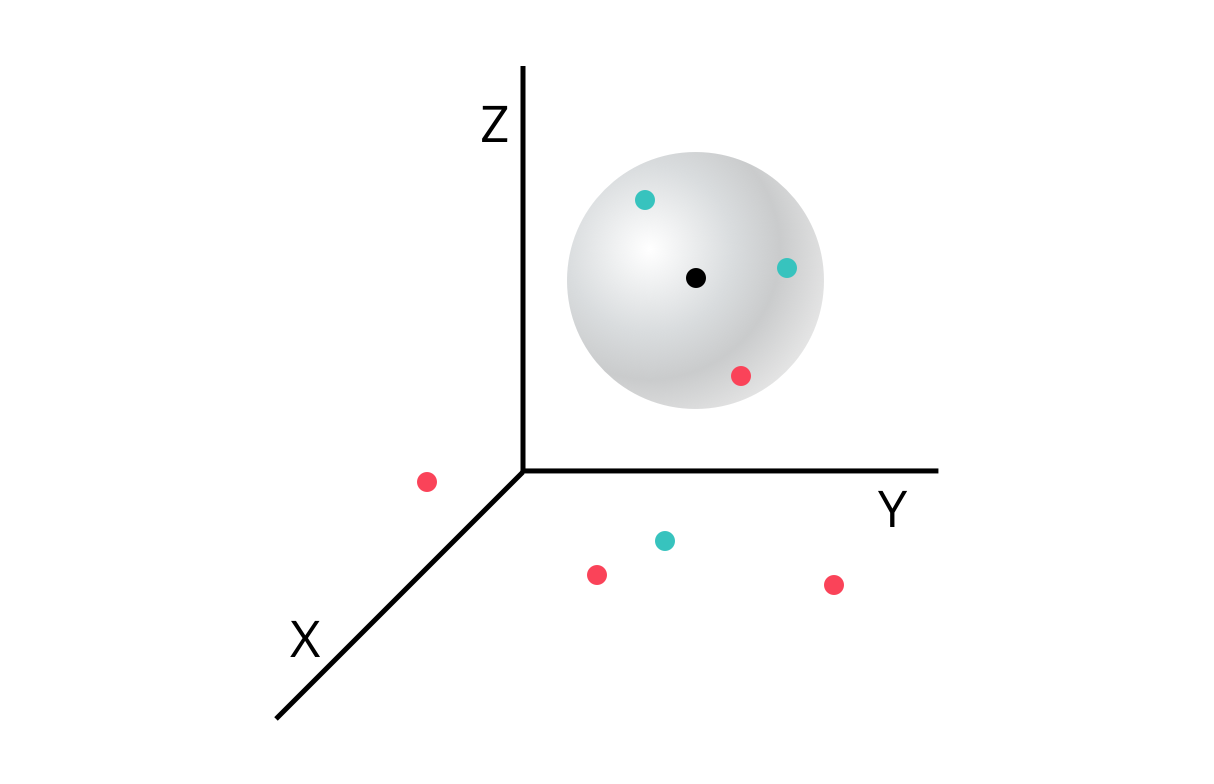

What if we’re not happy with just three dimensions? Unfortunately, it becomes pretty difficult to visualize points in dimensions higher than 3. But that doesn’t mean we can’t find the distance between them.

The generalized distance formula between points A and B is as follows:
<b><p>&#8730;((A<sub>1</sub>-B<sub>1</sub>)<sup>2</sup>+(A<sub>2</sub>-B<sub>2</sub>)<sup>2</sup>)+....(A<sub>n</sub>-B<sub>n</sub>)</p></b><br>
Here, A1-B1 is the difference between the first feature of each point. An-Bn is the difference between the last feature of each point.

Using this formula, we can find the K-Nearest Neighbors of a point in N-dimensional space! We now can use as much information about our movies as we want.

We will eventually use these distances to find the nearest neighbors to an unlabeled point.


1.
Modify your distance function to work with any number of dimensions. Use a for loop to iterate through the dimensions of each movie.

Return the total distance between the two movies.

2.
We’ve added a third dimension to each of our movies.

Print the new distance between Star Wars and Raiders of the Lost Ark.

Print the new distance between Star Wars and Mean Girls.

Which movie is Star Wars closer to now?

In [2]:
star_wars = [125, 1977, 11000000]
raiders = [115, 1981, 18000000]
mean_girls = [97, 2004, 17000000]

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

print(distance(star_wars, raiders))
print(distance(star_wars, mean_girls))

7000000.000008286
6000000.000126083


#### Data with Different Scales: Normalization
we’ll implement the three steps of the K-Nearest Neighbor Algorithm:

Normalize the data
Find the k nearest neighbors
Classify the new point based on those neighbors
When we added the dimension of budget, you might have realized there are some problems with the way our data currently looks.

Consider the two dimensions of release date and budget. The maximum difference between two movies’ release dates is about 125 years (The Lumière Brothers were making movies in the 1890s). However, the difference between two movies’ budget can be millions of dollars.

The problem is that the distance formula treats all dimensions equally, regardless of their scale. If two movies came out 70 years apart, that should be a pretty big deal. However, right now, that’s exactly equivalent to two movies that have a difference in budget of 70 dollars. The difference in one year is exactly equal to the difference in one dollar of budget. That’s absurd!

Another way of thinking about this is that the budget completely outweighs the importance of all other dimensions because it is on such a huge scale. The fact that two movies were 70 years apart is essentially meaningless compared to the difference in millions in the other dimension.

The solution to this problem is to normalize the data so every value is between 0 and 1. 


1.Write a function named min_max_normalize that takes a list of numbers named lst as a parameter (lst short for list).
Begin by storing the minimum and maximum values of the list in variables named minimum and maximum

2.
Create an empty list named normalized. Loop through each value in the original list.
Using min-max normalization, normalize the value and add the normalized value to the new list.
After adding every normalized value to normalized, return normalized.

3.
Call min_max_normalize using the given list release_dates. Print the resulting list.
What does the date 1897 get normalized to? Why is it closer to 0 than 1?

In [3]:
release_dates = [1897.0, 1998.0, 2000.0, 1948.0, 1962.0, 1950.0, 1975.0, 1960.0, 2017.0, 1937.0, 1968.0, 1996.0, 1944.0, 1891.0, 1995.0, 1948.0, 2011.0, 1965.0, 1891.0, 1978.0]

def min_max_normalize(lst):
  minimum = min(lst)
  maximum = max(lst)
  normalized = []
  
  for value in lst:
    normalized_num = (value - minimum) / (maximum - minimum)
    normalized.append(normalized_num)
  
  return normalized

print(min_max_normalize(release_dates))

[0.047619047619047616, 0.8492063492063492, 0.8650793650793651, 0.4523809523809524, 0.5634920634920635, 0.46825396825396826, 0.6666666666666666, 0.5476190476190477, 1.0, 0.36507936507936506, 0.6111111111111112, 0.8333333333333334, 0.42063492063492064, 0.0, 0.8253968253968254, 0.4523809523809524, 0.9523809523809523, 0.5873015873015873, 0.0, 0.6904761904761905]


#### Finding the Nearest Neighbors
Now that our data has been normalized and we know how to find the distance between two points, we can begin classifying unknown data!

To do this, we want to find the k nearest neighbors of the unclassified point. In a few exercises, we’ll learn how to properly choose k, but for now, let’s choose a number that seems somewhat reasonable. Let’s choose 5.

In order to find the 5 nearest neighbors, we need to compare this new unclassified movie to every other movie in the dataset. This means we’re going to be using the distance formula again and again. We ultimately want to end up with a sorted list of distances and the movies associated with those distances.

It might look something like this:

[
  [0.30, 'Superman II'],
  [0.31, 'Finding Nemo'],
  ...
  ...
  [0.38, 'Blazing Saddles']
]
In this example, the unknown movie has a distance of 0.30 to Superman II.

1.
Begin by running the program. We’ve imported and normalized a movie dataset for you and printed the data for the movie Bruce Almighty. Each movie in the dataset has three features:

the normalized budget (dollars)<br>
the normalized duration (minutes)<br>
the normalized release year.<br>
We’ve also imported the labels associated with every movie in the dataset. The label associated with Bruce Almighty is a 0, indicating that it is a bad movie. Remember, a bad movie had a rating less than 7.0 on IMDb.

2.
Create a function called classify that has three parameters: the data point you want to classify named unknown, the dataset you are using to classify it named dataset, and k, the number of neighbors you are interested in.

For now put pass inside your function.

3.
Inside the classify function remove pass. Create an empty list called distances.
Loop through every title in the dataset.
Access the data associated with every title by using dataset[title].
Find the distance between dataset[title] and unknown and store this value in a variable called distance_to_point.
Add the list [distance_to_point, title] to distances.
Outside of the loop, return distances.

4.
We now have a list of distances and points. We want to sort this list by the distance (from smallest to largest). Before returning distances, use Python’s built-in sort() function to sort distances.

5.
The k nearest neighbors are now the first k items in distances. Create a new variable named neighbors and set it equal to the first k items of distances. You can use Python’s built-in slice function.
For example, lst[2:5] will give you a list of the items at indices 2, 3, and 4 of lst.
Return neighbors.

6.
Test the classify function and print the results. The three parameters you should use are:
[.4, .2, .9]
movie_dataset
5
Take a look at the 5 nearest neighbors. In the next exercise, we’ll check to see how many of those neighbors are good and how many are bad.

In [ ]:
from movies import movie_dataset, movie_labels

#print(movie_dataset['Bruce Almighty'])
#print(movie_labels['Bruce Almighty'])

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

def classify(unknown, dataset, k):
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]
  return neighbors
  
print(classify([.4, .2, .9], movie_dataset, 5))

#### Count Neighbors
We’ve now found the k nearest neighbors, and have stored them in a list that looks like this:

[
  [0.083, 'Lady Vengeance'],
  [0.236, 'Steamboy'],
  ...
  ...
  [0.331, 'Godzilla 2000']
]
Our goal now is to count the number of good movies and bad movies in the list of neighbors. If more of the neighbors were good, then the algorithm will classify the unknown movie as good. Otherwise, it will classify it as bad.

In order to find the class of each of the labels, we’ll need to look at our movie_labels dataset. For example, movie_labels['Akira'] would give us 1 because Akira is classified as a good movie.

You may be wondering what happens if there’s a tie. What if k = 8 and four neighbors were good and four neighbors were bad? There are different strategies, but one way to break the tie would be to choose the class of the closest point.


1.
Our classify function now needs to have knowledge of the labels. Add a parameter named labels to classify. It should be the third parameter.

2.
Continue writing your classify function.

Create two variables named num_good and num_bad and set them each at 0. Use a for loop to loop through every movie in neighbors. Store their title in a variable called title.

Remember, every neighbor is a list of [distance, title] so the title can be found at index 1.

For now, return title at the end of your function (outside of the loop).

3.
Use labels and title to find the label of each movie:

If that label is a 0, add one to num_bad.
If that label is a 1, add one to num_good.
For now, return num_good at the end of your function.

4.
We can finally classify our unknown movie:

If num_good is greater than num_bad, return a 1.
Otherwise, return a 0.
5.
Call classify using the following parameters and print the result.

[.4, .2, .9] as the movie you’re looking to classify.
movie_dataset the training dataset.
movie_labels as the training labels.
k = 5
Does the system predict this movie will be good or bad?

In [ ]:
from movies import movie_dataset, movie_labels

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

def classify(unknown, dataset, labels, k):
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]
  num_good = 0
  num_bad = 0
  for neighbor in neighbors:
    title = neighbor[1]
    if labels[title] == 0:
      num_bad += 1
    elif labels[title] == 1:
      num_good += 1
  if num_good > num_bad:
    return 1
  else:
    return 0

print(classify([.4, .2, .9], movie_dataset, movie_labels, 5))

In [ ]:
from movies import movie_dataset, movie_labels, normalize_point

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

def classify(unknown, dataset, labels, k):
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]
  num_good = 0
  num_bad = 0
  for neighbor in neighbors:
    title = neighbor[1]
    if labels[title] == 0:
      num_bad += 1
    elif labels[title] == 1:
      num_good += 1
  if num_good > num_bad:
    return 1
  else:
    return 0
  
print("Call Me By Your Name" in movie_dataset)
my_movie = [3500000, 132, 2017]
normalized_my_movie = normalize_point(my_movie)
print(normalized_my_movie)
print(classify(normalized_my_movie, movie_dataset, movie_labels, 5))


#### Training and Validation Sets
You’ve now built your first K Nearest Neighbors algorithm capable of classification. You can feed your program a never-before-seen movie and it can predict whether its IMDb rating was above or below 7.0. However, we’re not done yet. We now need to report how effective our algorithm is. After all, it’s possible our predictions are totally wrong!

As with most machine learning algorithms, we have split our data into a training set and validation set.

Once these sets are created, we will want to use every point in the validation set as input to the K Nearest Neighbor algorithm. We will take a movie from the validation set, compare it to all the movies in the training set, find the K Nearest Neighbors, and make a prediction. After making that prediction, we can then peek at the real answer (found in the validation labels) to see if our classifier got the answer correct.

If we do this for every movie in the validation set, we can count the number of times the classifier got the answer right and the number of times it got it wrong. Using those two numbers, we can compute the validation accuracy.

Validation accuracy will change depending on what K we use. In the next exercise, we’ll use the validation accuracy to pick the best possible K for our classifier.

1.
We’ve imported training_set, training_labels, validation_set, and validation_labels. Let’s take a look at one of the movies in validation_set.

The movie "Bee Movie" is in validation_set. Print out the data associated with Bee Movie. Print Bee Movie ‘s label as well (which can be found in validation_labels).

Is Bee Movie a good or bad movie?

2.
Let’s have our classifier predict whether Bee Movie is good or bad using k = 5. Call the classify function using the following parameters:

Bee Movie‘s data
training_set
training_labels
5
Store the results in a variable named guess and print guess.

3.
Let’s check to see if our classification got it right. If guess is equal to Bee Movie‘s real class (found in validation_labels), print "Correct!". Otherwise, print "Wrong!".

In [ ]:
from movies import training_set, training_labels, validation_set, validation_labels

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

def classify(unknown, dataset, labels, k):
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]
  num_good = 0
  num_bad = 0
  for neighbor in neighbors:
    title = neighbor[1]
    if labels[title] == 0:
      num_bad += 1
    elif labels[title] == 1:
      num_good += 1
  if num_good > num_bad:
    return 1
  else:
    return 0
  
print(validation_set["Bee Movie"])
print(validation_labels["Bee Movie"])

guess=classify(validation_set["Bee Movie"], training_set, training_labels, 5)
print(guess)
if guess == validation_labels["Bee Movie"]:
  print("Correct!")
else:
  print("Wrong!")


#### Choosing K
In the previous exercise, we found that our classifier got one point in the training set correct. Now we can test every point to calculate the validation accuracy.

The validation accuracy changes as k changes. The first situation that will be useful to consider is when k is very small. Let’s say k = 1. We would expect the validation accuracy to be fairly low due to overfitting. Overfitting is a concept that will appear almost any time you are writing a machine learning algorithm. Overfitting occurs when you rely too heavily on your training data; you assume that data in the real world will always behave exactly like your training data. In the case of K-Nearest Neighbors, overfitting happens when you don’t consider enough neighbors. A single outlier could drastically determine the label of an unknown point. Consider the image below.

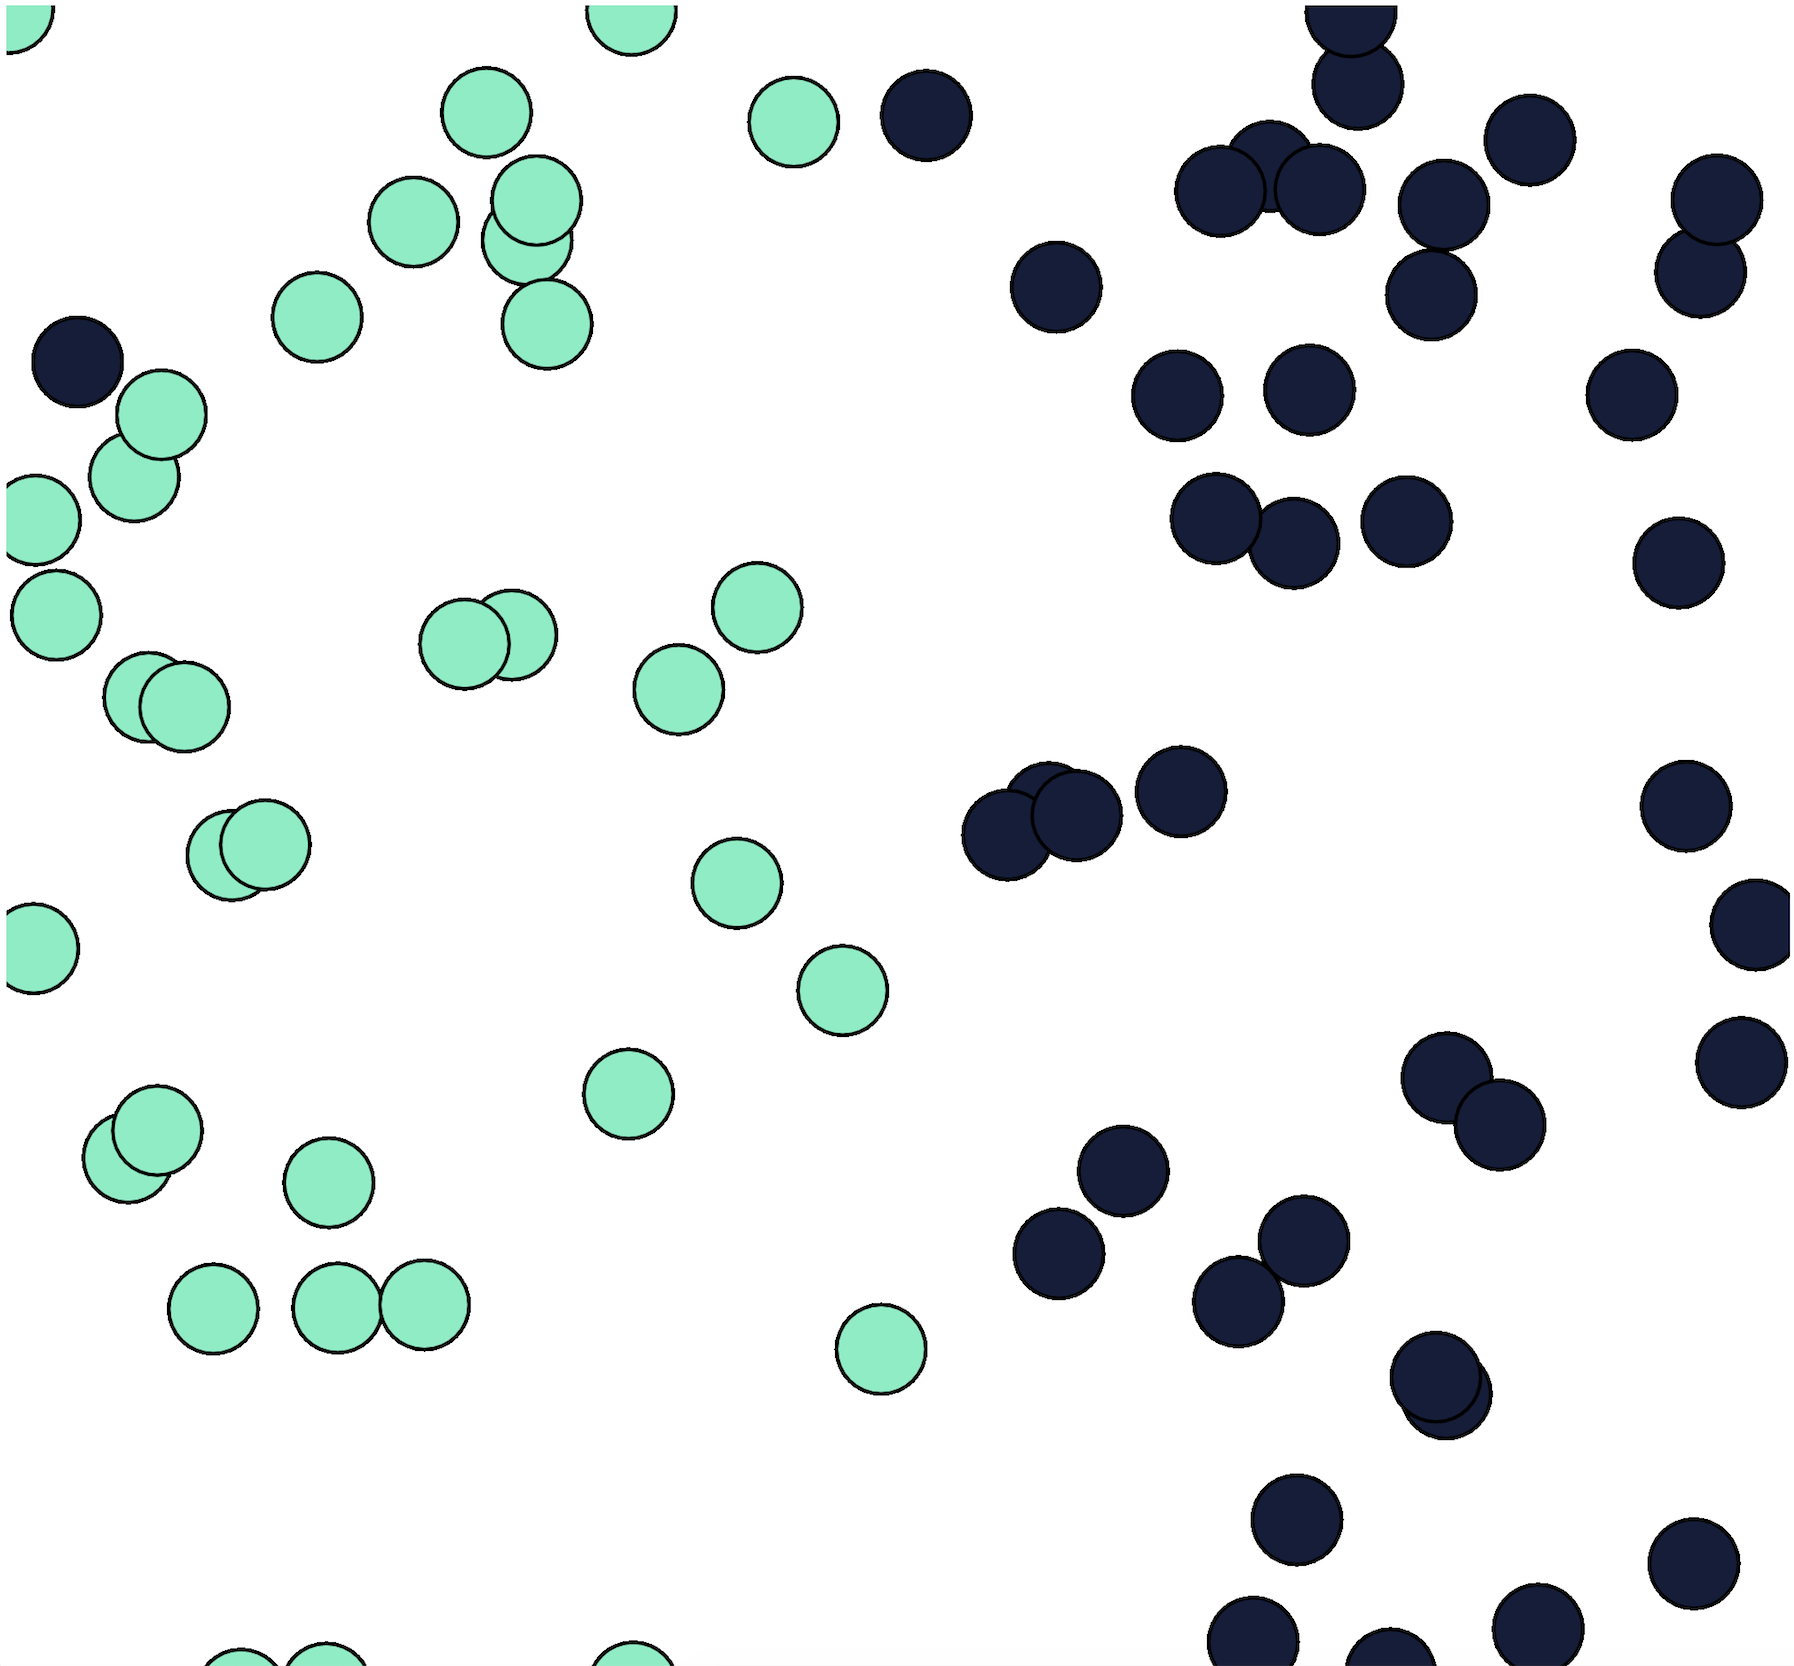

The dark blue point in the top left corner of the graph looks like a fairly significant outlier. When k = 1, all points in that general area will be classified as dark blue when it should probably be classified as green. Our classifier has relied too heavily on the small quirks in the training data.

On the other hand, if k is very large, our classifier will suffer from underfitting. Underfitting occurs when your classifier doesn’t pay enough attention to the small quirks in the training set. Imagine you have 100 points in your training set and you set k = 100. Every single unknown point will be classified in the same exact way. The distances between the points don’t matter at all! This is an extreme example, however, it demonstrates how the classifier can lose understanding of the training data if k is too big.


1.
Begin by creating a function called find_validation_accuracy that takes five parameters. The parameters should be training_set, training_labels, validation_set, validation_labels, and k.

2.
Create a variable called num_correct and have it begin at 0.0. Loop through the movies of validation_set, and call classify using each movie’s data, the training_set, the training_labels, and k. Store the result in a variable called guess. For now, return guess outside of your loop.

Remember, the movie’s data can be found by using validation_set[title].

3.
Inside the for loop, compare guess to the corresponding label in validation_labels. If they were equal, add 1 to num_correct. For now, outside of the for loop, return num_correct

4.
Outside the for loop return the validation error. This should be num_correct divided by the total number of points in the validation set.

5.
Call find_validation_accuracy with k = 3. Print the results The code should take a couple of seconds to run.

In [ ]:
from movies import training_set, training_labels, validation_set, validation_labels

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

def classify(unknown, dataset, labels, k):
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]
  num_good = 0
  num_bad = 0
  for neighbor in neighbors:
    title = neighbor[1]
    if labels[title] == 0:
      num_bad += 1
    elif labels[title] == 1:
      num_good += 1
  if num_good > num_bad:
    return 1
  else:
    return 0


#### Using sklearn
You’ve now written your own K-Nearest Neighbor classifier from scratch! However, rather than writing your own classifier every time, you can use Python’s sklearn library. sklearn is a Python library specifically used for Machine Learning. It has an amazing number of features, but for now, we’re only going to investigate its K-Nearest Neighbor classifier.

There are a couple of steps we’ll need to go through in order to use the library. First, you need to create a KNeighborsClassifier object. This object takes one parameter - k. For example, the code below will create a classifier where k = 3

classifier = KNeighborsClassifier(n_neighbors = 3)
Next, we’ll need to train our classifier. The .fit() method takes two parameters. The first is a list of points, and the second is the labels associated with those points. So for our movie example, we might have something like this

training_points = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]

training_labels = [0, 1, 1]
classifier.fit(training_points, training_labels)
Finally, after training the model, we can classify new points. The .predict() method takes a list of points that you want to classify. It returns a list of its guesses for those points.

unknown_points = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]

guesses = classifier.predict(unknown_points)

1.
We’ve imported sklearn for you. Create a KNeighborsClassifier named classifier that uses k=5.

2.
We’ve also imported some movie data. Train your classifier using movie_dataset as the training points and labels as the training labels.

3.
Let’s classify some movies. Classify the following movies: [.45, .2, .5], [.25, .8, .9],[.1, .1, .9]. Print the classifications!

Which movies were classified as good movies and which were classified as bad movies?

Remember, those three numbers associated with a movie are the normalized budget, run time, and year of release.

In [ ]:
from movies import movie_dataset, labels
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(movie_dataset, labels)
guess = classifier.predict([[.45, .2, .5], [.25, .8, .9],[.1, .1, .9]])
print(guess)